In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
def CAGR(first, last, periods):
    return ((last/first)**(1/periods)-1) * 100

In [3]:

file_path = 'D:/stockmarketpreddiction/AAPL Historical Data.csv'  
df = pd.read_csv(file_path)


In [4]:
print(df.head())

         Date   Price    Open    High     Low    Vol. Change %
0  21-06-2024  207.49  210.39  211.85  207.32  85.13M   -1.04%
1  20-06-2024  209.68  213.93  214.18  208.86  86.00M   -2.15%
2  18-06-2024  214.29  217.59  218.61  213.02  79.69M   -1.10%
3  17-06-2024  216.67  213.37  218.95  212.72  93.73M    1.97%
4  14-06-2024  212.49  213.85  215.17  211.30  70.12M   -0.82%


In [5]:
df['Date'] = pd.to_datetime(df['Date']) 
df.sort_values('Date', inplace=True)  

C:\Users\sinch\AppData\Local\Temp\ipykernel_6384\3656792037.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime format


In [6]:
x = np.arange(len(df)).reshape(-1, 1)  
y = df['Price'].values 

In [7]:
degree = 5                            
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(x)

In [8]:
model = LinearRegression()
model.fit(X_poly, y.reshape(-1, 1))


LinearRegression()

In [9]:
future_days = 30                         
future_x = np.arange(len(df), len(df) + future_days).reshape(-1, 1)
future_X_poly = poly_features.transform(future_x)
future_y = model.predict(future_X_poly)

In [10]:
last_prediction = future_y[-1][0]

In [11]:
print(f"Predicted closing price for the last day in the dataset + {future_days} days: ${last_prediction:.2f}")

Predicted closing price for the last day in the dataset + 30 days: $-24204.98


In [12]:
first_price = y[0]
predicted_price = future_y[-1][0]
periods = future_days / 365  
cagr = CAGR(first_price, predicted_price, periods)
print(f"Estimated CAGR for the next {future_days} days: {cagr:.2f}%")

Estimated CAGR for the next 30 days: nan%


C:\Users\sinch\AppData\Local\Temp\ipykernel_6384\2279340488.py:2: RuntimeWarning: invalid value encountered in scalar power
  return ((last/first)**(1/periods)-1) * 100


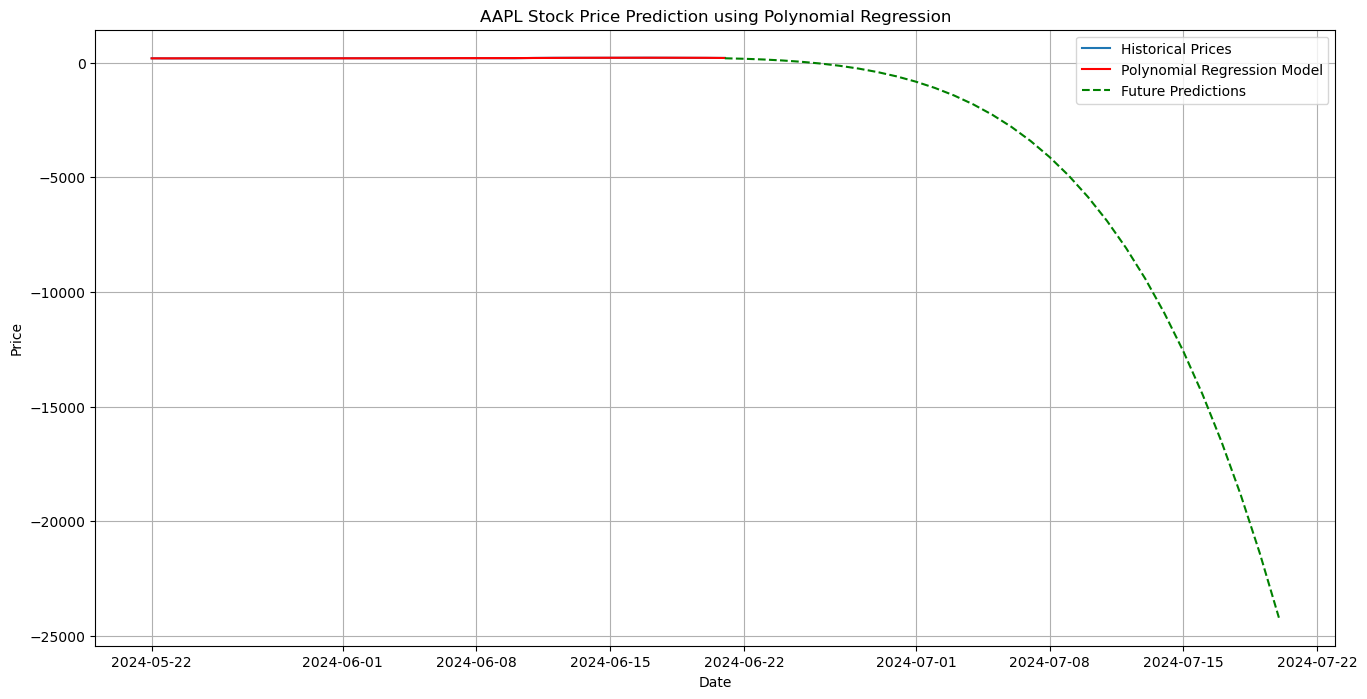

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(df['Date'], y, label='Historical Prices')
plt.plot(df['Date'], model.predict(X_poly), color='r', label='Polynomial Regression Model')
plt.plot(pd.date_range(df['Date'].iloc[-1], periods=future_days, freq='D'), future_y, color='g', linestyle='--', label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Price Prediction using Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()